In [25]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import matplotlib.pyplot as plt
import xarray as xr
import xclim

import fileio

In [11]:
awap_file = '/g/data/xv83/dbi599/pr_awap_1900-2019_A-DEC-sum_wheat-sheep-sum.zarr.zip'

In [12]:
cafe_file = '/g/data/xv83/dbi599/pr_cafe-c5-d60-pX-f6_19900501-19931101_A-DEC-sum_wheat-sheep-sum.zarr.zip'

In [13]:
awap_ds = fileio.open_file(awap_file)

In [14]:
awap_ds

<xarray.Dataset>
Dimensions:  (region: 3, time: 120)
Coordinates:
  * region   (region) object 'south-west' 'south-east' 'north-east'
  * time     (time) object 1900-01-01 00:00:00 ... 2019-01-01 00:00:00
Data variables:
    pr       (time, region) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes:
    history:  Tue Jul 27 11:51:35 2021: /g/data/e14/dbi599/miniconda3/envs/un...

In [15]:
awap_ds['pr']

<xarray.DataArray 'pr' (time: 120, region: 3)>
dask.array<open_dataset-88ba649c22cec7812cd39ae4628d045cpr, shape=(120, 3), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * region   (region) object 'south-west' 'south-east' 'north-east'
  * time     (time) object 1900-01-01 00:00:00 ... 2019-01-01 00:00:00
Attributes:
    ancillary_variables:  rain_rmse_month
    cell_methods:         time: sum
    comment:              For rainfall, the base monthly data and the spatial...
    grid_mapping:         crs
    long_name:            monthly rainfall total
    standard_name:        lwe_thickness_of_precipitation_amount
    units:                mm month-1
    valid_max:            1000
    valid_min:            0

TODO: Change long name and standard name.

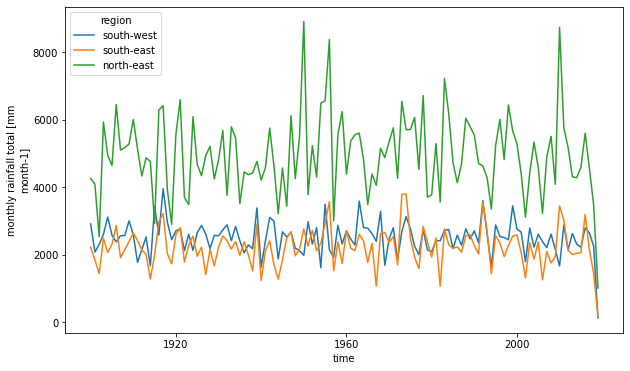

In [16]:
fig = plt.figure(figsize=[10, 6])

awap_ds['pr'].plot(hue='region')

plt.show()

TODO: Check if the final timestep has less than a full year of data.

In [17]:
cafe_ds = fileio.open_file(cafe_file)

In [18]:
cafe_ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 8, lead_time: 11, region: 3)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1990-05-16 00:00:00 ... 1993-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9 10
  * region     (region) object 'south-west' 'south-east' 'north-east'
    time       (lead_time, init_date) object dask.array<chunksize=(11, 8), meta=np.ndarray>
Data variables:
    pr         (init_date, lead_time, region, ensemble) float32 dask.array<chunksize=(1, 11, 1, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Tue Jul 27 11:52:34 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [19]:
cafe_ds['pr']

<xarray.DataArray 'pr' (init_date: 8, lead_time: 11, region: 3, ensemble: 96)>
dask.array<open_dataset-5d63eead7dfe97ded02f6debf2cd2af0pr, shape=(8, 11, 3, 96), dtype=float32, chunksize=(1, 11, 1, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1990-05-16 00:00:00 ... 1993-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9 10
  * region     (region) object 'south-west' 'south-east' 'north-east'
    time       (lead_time, init_date) object dask.array<chunksize=(11, 8), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          mm month-1

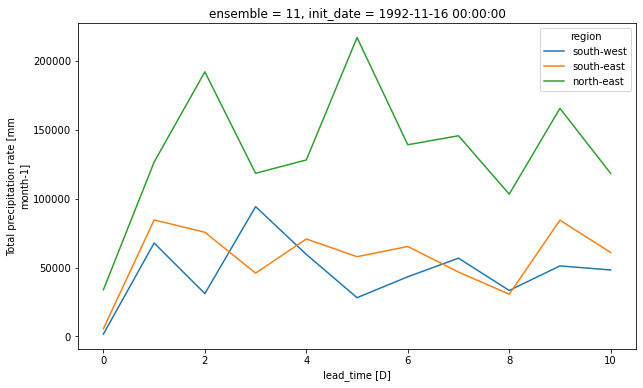

In [20]:
fig = plt.figure(figsize=[10, 6])

cafe_ds.isel(ensemble=10, init_date=5)['pr'].plot(hue='region')

plt.show()

## Raw data

In [31]:
monthly_file = '/g/data/xv83/ds0092/CAFE/forecasts/f6/WIP/c5-d60-pX-f6-19900501/ZARR/atmos_isobaric_month.zarr.zip'
ds_monthly = xr.open_zarr(monthly_file, consolidated=True)
ds_monthly

<xarray.Dataset>
Dimensions:         (ensemble: 96, lat: 90, level: 21, lon: 144, time: 120)
Coordinates:
    area            (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT      (time) timedelta64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T1      (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T2      (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * ensemble        (ensemble) int64 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * lat             (lat) float64 -89.49 -87.98 -85.96 ... 85.96 87.98 89.49
  * level           (level) float32 1.0 5.0 10.0 20.0 ... 850.0 925.0 1e+03
  * lon             (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time            (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
    zsurf           (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Data variables: (12/38)
    DELP            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(24, 96, 1, 90, 144), meta=np.ndarray>
    awp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    evap            (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    h500            (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    hght            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(24, 96, 1, 90, 144), meta=np.ndarray>
    lwdn_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    ...              ...
    u_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    ucomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(24, 96, 1, 90, 144), meta=np.ndarray>
    v_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    vcomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(24, 96, 1, 90, 144), meta=np.ndarray>
    vis_exopd_vl_c  (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
    wvp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(24, 96, 90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [32]:
ds_monthly['precip']

<xarray.DataArray 'precip' (time: 120, ensemble: 96, lat: 90, lon: 144)>
dask.array<open_dataset-247efdc4fade7400728e19893840627fprecip, shape=(120, 96, 90, 144), dtype=float32, chunksize=(24, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
    area        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * ensemble    (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
    zsurf       (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [41]:
ds_monthly['time'][0:2]

<xarray.DataArray 'time' (time: 2)>
array([cftime.DatetimeJulian(1990, 5, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 6, 16, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
  * time        (time) object 1990-05-16 12:00:00 1990-06-16 00:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [42]:
mel_monthly_data = ds_monthly['precip'].sel(ensemble=1, lat=-37.81, lon=144.96, method='nearest').values
mel_monthly_data[0:2]

array([0.00099051, 0.00030501], dtype=float32)

In [37]:
daily_file = '/g/data/xv83/ds0092/CAFE/forecasts/f6/WIP/c5-d60-pX-f6-19900501/ZARR/atmos_isobaric_daily.zarr.zip'
ds_daily = xr.open_zarr(daily_file, consolidated=True)
ds_daily

<xarray.Dataset>
Dimensions:         (ensemble: 96, lat: 90, latb: 91, level: 21, lon: 144, lonb: 145, nv: 2, time: 3653)
Coordinates: (12/14)
    area            (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT      (time) timedelta64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T1      (time) datetime64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T2      (time) datetime64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
  * ensemble        (ensemble) int64 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * lat             (lat) float64 -89.49 -87.98 -85.96 ... 85.96 87.98 89.49
    ...              ...
  * lon             (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lonb            (lonb) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5 360.0
  * nv              (nv) float64 1.0 2.0
  * time            (time) object 1990-05-01 12:00:00 ... 2000-04-30 12:00:00
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(3653, 2), meta=np.ndarray>
    zsurf           (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Data variables: (12/38)
    DELP            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    awp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    evap            (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    h500            (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    hght            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    lwdn_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    ...              ...
    u_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    ucomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    v_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    vcomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    vis_exopd_vl_c  (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    wvp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [38]:
ds_daily['precip']

<xarray.DataArray 'precip' (time: 3653, ensemble: 96, lat: 90, lon: 144)>
dask.array<open_dataset-ebd81f274e5436f00e1cd5f1a6406f65precip, shape=(3653, 96, 90, 144), dtype=float32, chunksize=(28, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
    area        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
  * ensemble    (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 1990-05-01 12:00:00 ... 2000-04-30 12:00:00
    zsurf       (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [40]:
ds_daily['time'][0:31]

<xarray.DataArray 'time' (time: 31)>
array([cftime.DatetimeJulian(1990, 5, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 3, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 4, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 5, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 6, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 7, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 8, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 9, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 10, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 11, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 12, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 13, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 14, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 15, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 18, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 19, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 20, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 21, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 23, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 24, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 25, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 26, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 27, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1990, 5, 31, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
  * time        (time) object 1990-05-01 12:00:00 ... 1990-05-31 12:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [43]:
mel_daily_data = ds_daily['precip'].sel(ensemble=1, lat=-37.81, lon=144.96, method='nearest').values
mel_daily_data[0:31]

array([2.7008046e-04, 4.0226802e-05, 3.1519809e-05, 7.3761199e-05,
       1.9066871e-05, 1.4141870e-05, 3.2097018e-06, 1.1826857e-06,
       2.5389490e-05, 6.7852961e-05, 6.3715052e-05, 1.5243638e-05,
       1.4778222e-05, 1.8617427e-06, 7.7983968e-05, 9.1075408e-06,
       3.7337697e-05, 1.4194879e-05, 1.7291187e-06, 2.5746502e-05,
       1.9049472e-05, 2.9841065e-06, 4.3462292e-06, 9.1764753e-07,
       4.2093016e-06, 4.5184271e-07, 4.1510366e-06, 1.3122775e-04,
       7.1880127e-06, 3.7703080e-07, 7.4730729e-06], dtype=float32)

In [44]:
mel_daily_data[0:31].mean()

3.19518e-05

In [45]:
mel_daily_data[0:31].sum()

0.0009905058

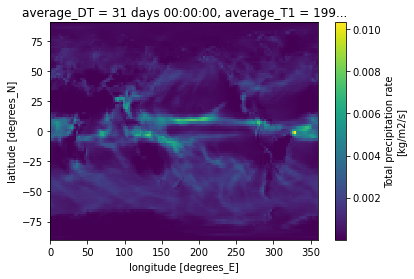

In [6]:
ds['precip'].isel(time=0, ensemble=0).plot()

In [10]:
ds['time'].dt.days_in_month

<xarray.DataArray 'days_in_month' (time: 120)>
array([31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
       31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31,
       30])
Coordinates:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * time        (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00

In [23]:
test_manual = ds['precip'] * 86400 * ds['time'].dt.days_in_month

In [24]:
test_manual

<xarray.DataArray (time: 120, ensemble: 96, lat: 90, lon: 144)>
dask.array<mul, shape=(120, 96, 90, 144), dtype=float64, chunksize=(24, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
    area        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * ensemble    (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
    zsurf       (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>

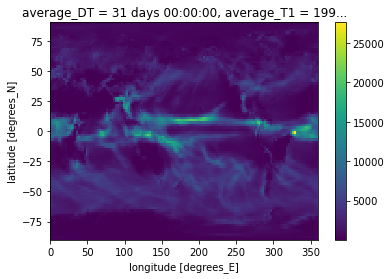

In [29]:
test_manual.isel(time=0, ensemble=0).plot()

In [26]:
test_xclim = xclim.units.convert_units_to(ds['precip'], 'mm/month')

In [27]:
test_xclim

<xarray.DataArray 'precip' (time: 120, ensemble: 96, lat: 90, lon: 144)>
dask.array<mul, shape=(120, 96, 90, 144), dtype=float32, chunksize=(24, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
    area        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
  * ensemble    (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 1990-05-16 12:00:00 ... 2000-04-16 00:00:00
    zsurf       (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          mm month-1

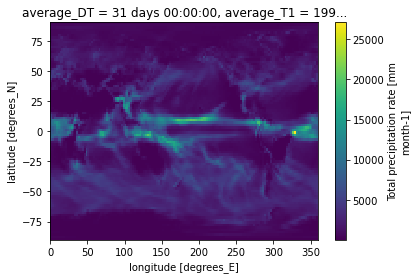

In [30]:
test_xclim.isel(time=0, ensemble=0).plot()